importing pandas and everything needed

In [2]:
import pandas as pd
import geopandas
import fpsnippets
%matplotlib inline

importing datasets

In [3]:
con=pd.read_csv("Condemed.csv")
hood=geopandas.read_file("Neighborhoods_.shx")


filter dataset to remove houses without primary address

In [4]:
con_mask=con["address"]!="No primary address specified"
condemed=con[con_mask]
cond_mask=condemed["parcel_id"]!="invalid input"
condemed=condemed[cond_mask]
condm_mask=condemed["parcel_id"]!="invalid_input"
condemed=condemed[condm_mask]


get zipe code

In [5]:
#creates a zip code list
zip_code=[]
for x, row in condemed.iterrows():

    temp=row["address"]
   
    temp=str(temp)

    zipe=temp[-5:]
    zipe=int(zipe)
    zip_code.append(zipe)

#creates a column for zip code
condemed["Zip Code"]=zip_code


In [6]:
zip_code

[15214,
 15219,
 15201,
 15206,
 15206,
 15224,
 15212,
 15224,
 15224,
 15210,
 15210,
 15206,
 15201,
 15224,
 15201,
 15210,
 15212,
 15208,
 15210,
 15210,
 15210,
 15219,
 15210,
 15201,
 15212,
 15219,
 15207,
 15208,
 15212,
 15201,
 15210,
 15233,
 15233,
 15207,
 15210,
 15210,
 15227,
 15210,
 15211,
 15210,
 15206,
 15208,
 15206,
 15210,
 15217,
 15214,
 15212,
 15210,
 15235,
 15212,
 15210,
 15210,
 15206,
 15221,
 15208,
 15206,
 15208,
 15206,
 15206,
 15213,
 15213,
 15211,
 15210,
 15210,
 15212,
 15219,
 15208,
 15206,
 15210,
 15210,
 15208,
 15210,
 15210,
 15207,
 15214,
 15219,
 15212,
 15210,
 15212,
 15210,
 15208,
 15208,
 15208,
 15208,
 15208,
 15208,
 15214,
 15205,
 15212,
 15201,
 15206,
 15210,
 15210,
 15221,
 15207,
 15219,
 15206,
 15210,
 15208,
 15208,
 15214,
 15212,
 15212,
 15208,
 15208,
 15208,
 15208,
 15217,
 15207,
 15212,
 15207,
 15210,
 15217,
 15214,
 15204,
 15233,
 15214,
 15212,
 15206,
 15212,
 15207,
 15214,
 15206,
 15212,
 15206,


Turn zip code to neighborhood

In [13]:
#neighborhoods=pd.DataFrame()
neighborhoods=[]
all_zip_codes=[]
for x in range (len(zip_code)):
    
    temp=zip_code[x]
    nh=fpsnippets.zip_to_neighborhoods(temp)
    #hoods=pd.DataFrame({"Zip Code":[temp]},{"Neighborhood":[nh]})
    #neighborhoods.concat(hoods)
    for y in nh:
        neighborhoods.append(y)
        all_zip_codes.append(temp)
    #neighborhoods.append(nh)
data = {
    "Neighborhood": neighborhoods,
    "Zip Code": all_zip_codes
}
df = pd.DataFrame(data)

#neighborhoods.head(10)

merge neighborhood df with the condemened list

In [27]:
final_df=pd.merge(condemed, df)
final_df=final_df.groupby("Neighborhood")["_id"].count()
final_df=final_df.dropna()
final_df

Neighborhood
Allegheny Center       170549
Allegheny West         170549
Allentown              293457
Arlington              290321
Arlington Heights      290321
                        ...  
Upper Lawrenceville      3136
West End                88331
West Oakland            81770
Westwood                 7930
Windgap                 19325
Name: _id, Length: 90, dtype: int64

merge the housing map with the neighborhood map

In [28]:
house_map=hood.merge(final_df, how="left",left_on="hood", right_on="Neighborhood")
house_map


,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,_id
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",142683
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",62804
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",69885
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",81770
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",286225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.470266e+06,15761.679800,"POLYGON ((-79.89711 40.42762, -79.89663 40.427...",7019
86,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.050536e+06,17830.507786,"POLYGON ((-79.95848 40.44846, -79.95872 40.448...",81770
87,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.689127e+07,21714.648283,"POLYGON ((-80.03619 40.45073, -80.03496 40.449...",24517
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.576841e+07,34700.371969,"POLYGON ((-79.97726 40.43274, -79.97725 40.432...",370410


make map

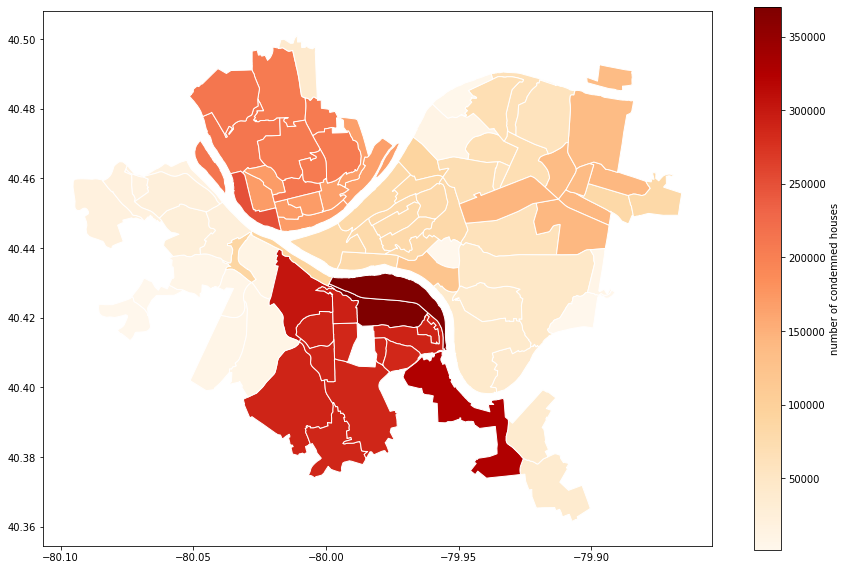

In [39]:
house_map.plot(column="_id",cmap="OrRd",edgecolor="white",legend=True,legend_kwds={"label":"number of condemned houses"},figsize=(15,10))